# 이상치 탐지를 위해 DBSCAN ( Clustering ) 사용

## DBSCAN이란 ? 

DBSCAN(density-based spatial clustering of applications with noise)
- 밀도 기반 데이터 클러스터링 알고리즘
- 클러스터의 개수를 미리 지정할 필요가없다.
- 복잡한 형상의 데이터셋에서도 적용 가능하다 (ex. 반달 모양)

![DBSCAN moon](https://user-images.githubusercontent.com/53929665/103149892-5d000d00-47b1-11eb-8de0-4bcfb20e5084.png)

- 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다 ( 이상치 탐지 가능 )
- 큰 dataset에도 적용 가능하다.


단점 : 

- 부분적으로 비슷한 밀도를 가진 데이터셋의 경우 해당 알고리즘은 연약하다.(?)
- 데이터 포인트 처리 순서가 매번 다르기 때문에 해당 알고리즘을 시행할 때마다 다른 결과가 도출될 수 있다.
- 데이터 차원이 높아질수록 eps 매개변수의 값을 지정하기 어려워진다.


DBSCAN(eps=0.2, min_samples = 5, metric='euclidean')

* **eps** : 가까운 point의 범위를 결정하는데 중요한 역할을 하는 매개변수로, 높게 설정하면 클러스터에 포함되는 데이터 개수가 많아지기 때문에 클러스터의 개수가 적어지고, 낮게 설정하면 클러스터의 개수가 많아진다.
* **min_samples** : 클러스터의 최소 크기를 결정하는 매개변수이다.
    - 널리 퍼져있는 지역일 경우 point를 잡음으로 분류할지 클러스터로 분류할지 결정하는데 중요한 역할을 한다.
    - min_sample이 높아질수록 핵심 data point가 작아지고, 노이즈 point는 많아진다. ( 조건 충족이 어렵기 때문이다. )


In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt

In [60]:
def draw_plot(df, db) :
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(df['x'], df['y'], df['z'], c=db.labels_, edgecolor='black', marker='o', label=db)
    plt.legend()
    plt.tight_layout()
    plt.show()

E:/anomoly_detection_IOT_sensor/iotAnomaly_train
E:/anomoly_detection_IOT_sensor/iotAnomaly_train\csv_files


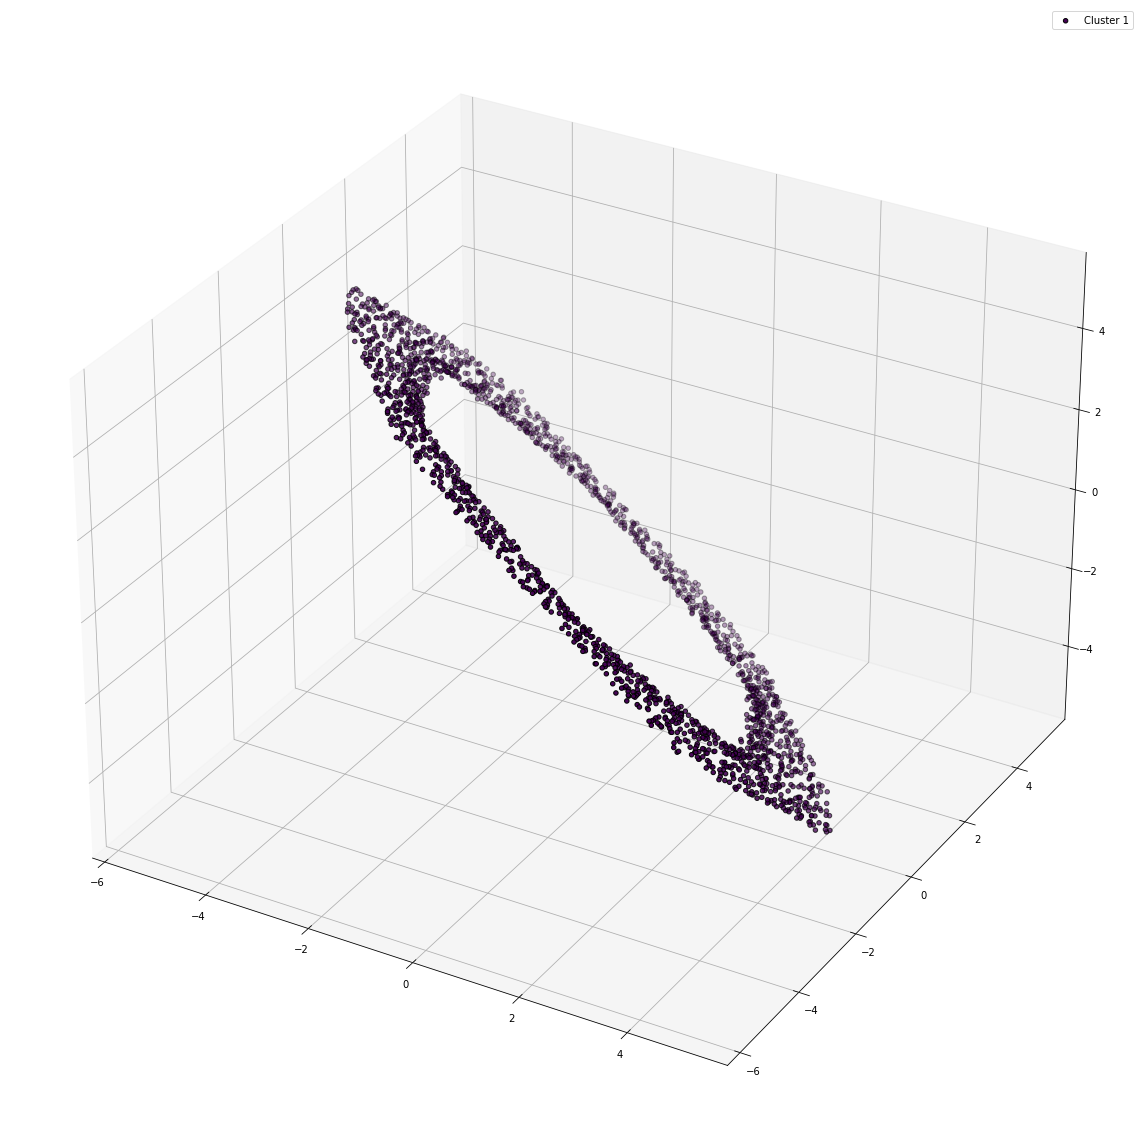

In [46]:
train_path = 'E:/anomoly_detection_IOT_sensor/iotAnomaly_train'
is_fail = []
for (path, dir, files) in os.walk(train_path):
    print(path)
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.csv':
            df = pd.read_csv("%s/%s" % (path, filename))
            db = DBSCAN(eps=0.5, min_samples = 1, metric='euclidean')
            y_train = db.fit_predict(df[['x', 'y', 'z']])
            draw_plot(df, y_train)
            is_fail.append([-1 in y_train,"%s/%s" % (path, filename)])
            break

In [24]:
# is_faile[0] : 고장인가? 고장이라면 True, 정상이라면 False 
# is_faile[1] : 해당 csv 파일의 path
is_fail

[[False,
  'E:/anomoly_detection_IOT_sensor/iotAnomaly_train\\csv_files/label_95383543536292.csv']]

## DBSCAN을 데이터에 적용


**'고장난 전류계는 주어진 csv파일에 이상치가 존재할 것이다.'**


이상치 검증을 위해 전체 데이터에 DBSCAN ( clustering )을 적용하였다.

* DBSCAN ( clustering )에서 이상치는 y_train(label)값이 -1이다.


In [70]:
train_path = 'E:/anomoly_detection_IOT_sensor/iotAnomaly_train'
is_fail = []
for (path, dir, files) in os.walk(train_path):
    print(path)
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.csv':
            df = pd.read_csv("%s/%s" % (path, filename))
            db = DBSCAN(eps=1.5, min_samples = 5, metric='euclidean')
            y_train = db.fit_predict(df[['x', 'y', 'z']])
            is_fail.append([-1 in y_train,"%s/%s" % (path, filename)])

E:/anomoly_detection_IOT_sensor/iotAnomaly_train
E:/anomoly_detection_IOT_sensor/iotAnomaly_train\csv_files


label을 모르기 떄문에 고장난 전류계는 1%인 58개 미만일 것이라고 가정하였다.

하이퍼 파라미터(DBSCAN의 eps, min_samples)를 조절하며 적절한 모델을 찾아보자.

In [14]:
# DBSCAN(eps=0.2, min_samples = 5 metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
for b, path in is_fail :
    if b == True :
        i += 1
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  48503 개


In [26]:
# DBSCAN(eps=0.5, min_samples = 1, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
for b, path in is_fail :
    if b == True :
        i += 1
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  0 개


In [28]:
# DBSCAN(eps=0.3, min_samples = 2, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
for b, path in is_fail :
    if b == True :
        i += 1
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  27459 개


In [30]:
# DBSCAN(eps=0.4, min_samples = 2, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
for b, path in is_fail :
    if b == True :
        i += 1
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  7381 개


In [50]:
# DBSCAN(eps=0.5, min_samples = 2, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
false_path = []
for b, path in is_fail :
    if b == True :
        i += 1
        false_path.append(path)
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  4247 개


In [67]:
# DBSCAN(eps=0.7, min_samples = 5, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
false_path = []
for b, path in is_fail :
    if b == True :
        i += 1
        false_path.append(path)
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')


고장난 것은  58631 중에  3797 개


In [69]:
# DBSCAN(eps=1.0, min_samples = 5, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
false_path = []
for b, path in is_fail :
    if b == True :
        i += 1
        false_path.append(path)
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  2301 개


In [71]:
# DBSCAN(eps=1.5, min_samples = 5, metric='euclidean')
# 고장난 것은 몇개인가?
i = 0
false_path = []
for b, path in is_fail :
    if b == True :
        i += 1
        false_path.append(path)
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  58631 중에  601 개


In [1]:
i = 0
for f_path in false_path :
    df = pd.read_csv(f_path)
    db = DBSCAN(eps=0.4, min_samples = 2, metric='euclidean')
    y_train = db.fit_predict(df[['x', 'y', 'z']])
    draw_plot(df, db)
    i += 1
    if i == 10 :
        break


In [74]:
len(db.labels_)

2000

## 가장 성능이 좋은 모델 저장

고장난 전류계는 58개 미만, 1개 이상 존재한다고 가정하였고, 이 안에 포함된다면 모델을 저장한다.

In [75]:
import pickle
with open("dbscan_fail_list.pickle", "wb") as handle:
    pickle.dump(is_fail, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
import pickle
with open("dbscan_fail_list.pickle", "rb") as handle:
    f = pickle.load(handle)
len(f), f[0]

(58631,
 [False,
  'E:/anomoly_detection_IOT_sensor/iotAnomaly_train\\csv_files/label_95383543536292.csv'])

### test case에 적용

In [77]:
train_path = 'E:/anomoly_detection_IOT_sensor/iotAnomaly_test'
is_fail = []
for (path, dir, files) in os.walk(train_path):
    print(path)
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.csv':
            df = pd.read_csv("%s/%s" % (path, filename))
            db = DBSCAN(eps=1.5, min_samples = 5, metric='euclidean')
            y_train = db.fit_predict(df[['x', 'y', 'z']])
            is_fail.append([-1 in y_train,"%s/%s" % (path, filename)])

E:/anomoly_detection_IOT_sensor/iotAnomaly_test
E:/anomoly_detection_IOT_sensor/iotAnomaly_test\csv_files


In [78]:
# 고장난 것은 몇개인가?
i = 0
false_path = []
for b, path in is_fail :
    if b == True :
        i += 1
        false_path.append(path)
print('고장난 것은 ', len(is_fail), '중에 ', i, '개')

고장난 것은  8744 중에  153 개


In [91]:
# plot 저장
def draw_plot_save(df, db, path) :
    fig = plt.figure(figsize=(32, 32))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter3D(df['x'], df['y'], df['z'], c=db.labels_, edgecolor='black', marker='o', label=db)
    plt.legend()
    plt.tight_layout()
#     plt.show()
#     fig.canvas.draw()
#     plt.imshow(np.array(fig.canvas.renderer._renderer)[:,:])
    plt.savefig(path+'/' + filename[:-4] + '.png',transparent=True, bbox_inches='tight', pad_inches = 0.1)

In [2]:
for f_path in false_path :
    df = pd.read_csv(f_path)
    db = DBSCAN(eps=0.4, min_samples = 2, metric='euclidean')
    y_train = db.fit_predict(df[['x', 'y', 'z']])
    draw_plot_save(df, db, f_path)


In [80]:
import pickle
with open("pickle/dbscan_fail_list_by_testcase.pickle", "wb") as handle:
    pickle.dump(is_fail, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [81]:
import pickle
with open("pickle/dbscan_fail_list_by_testcase.pickle", "rb") as handle:
    f = pickle.load(handle)
len(f), f[0]

(8744,
 [False,
  'E:/anomoly_detection_IOT_sensor/iotAnomaly_test\\csv_files/label_97513297798219.csv'])